In [ ]:
import pandas as pd

In [ ]:
file_path = 'CleanOdiBatting.csv'
data = pd.read_csv(file_path)

In [ ]:
# print(data.isnull().sum())

In [ ]:
# print(data['Name'].unique())
# print(data['Opposition'].unique())

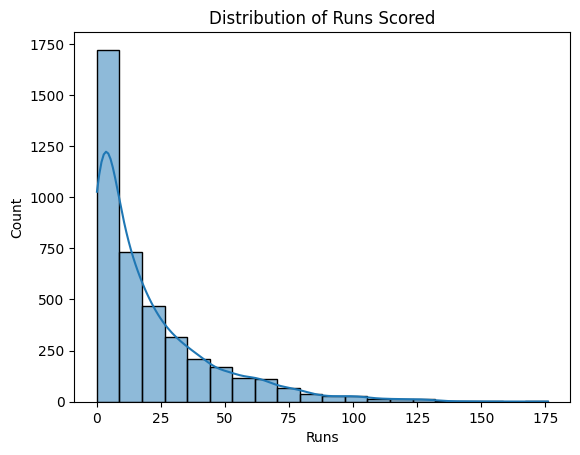

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Runs Distribution
sns.histplot(data['Runs'], bins=20, kde=True)
plt.title("Distribution of Runs Scored")
plt.show()


In [ ]:
# Define the performance score function with SR and weights for 4s and 6s
def calculate_performance(row):
    score = row['Runs'] + (0.5 * row['SR']) + (2 * row['4s']) + (3 * row['6s'])
    if row['Not Out'] == 1:  # Add bonus points for Not Out
        score += 10
    return score

# Apply the function to the dataset
data['Performance_Score'] = data.apply(calculate_performance, axis=1)

data.to_csv("batting_data.csv", index=False)
# Display the updated dataset with the new Performance_Score
print(data[['Name', 'Runs', '4s', '6s', 'SR', 'Not Out', 'Performance_Score']])


                    Name  Runs  4s  6s      SR  Not Out  Performance_Score
0           Tanzid Hasan    60   6   3  100.00        0            131.000
1             Litton Das     2   0   0   28.57        0             16.285
2     Mehidy Hasan Miraz    74   6   1   73.26        0            125.630
3           Afif Hossain    28   4   0   96.55        0             84.275
4            Mahmudullah    50   3   3  113.63        1            131.815
...                  ...   ...  ..  ..     ...      ...                ...
4036       Azhar Hossain     1   0   0   14.28        0              8.140
4037        Aminul Islam    10   1   0   38.46        0             31.230
4038        Zahid Razzak     6   0   0   28.57        0             20.285
4039      Athar Ali Khan    16   1   0   47.05        0             41.525
4040       Jahangir Shah     7   0   0   50.00        1             42.000

[4041 rows x 7 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("batting_data.csv")

# Select only relevant features for the model
features = ['Runs', 'BF', '4s', '6s', 'SR', 'Not Out']
target = 'Performance_Score'

# Define X (features) and y (target variable)
X = data[features]
y = data[target]

# Check for missing values
# print("Missing values:\n", X.isnull().sum())

# Fill or drop missing values (if any)
# X = X.fillna(0)  # Replace NaN with 0
# print("After handling missing values:\n", X.isnull().sum())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize (scale) the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3232, 6)
Test set shape: (809, 6)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Initialize the Linear Regression model
model = LinearRegression()

# Step 2: Train the model on the training data
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Calculate Mean Absolute Error (MAE) and R² Score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print("Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Step 5: Display the first 10 predicted vs actual values
results = pd.DataFrame({
    'Actual Performance_Score': y_test,
    'Predicted Performance_Score': y_pred
}).head(10)

print("\nComparison of Actual vs Predicted Performance Scores:")
print(results)


Model Performance:
Mean Absolute Error (MAE): 1.2778131800852605e-14
R² Score: 1.0

Comparison of Actual vs Predicted Performance Scores:
      Actual Performance_Score  Predicted Performance_Score
1157                    33.000                 3.300000e+01
149                     24.000                 2.400000e+01
2024                    29.075                 2.907500e+01
3180                    53.500                 5.350000e+01
3982                    25.830                 2.583000e+01
2929                    40.135                 4.013500e+01
1298                    43.525                 4.352500e+01
3493                    57.740                 5.774000e+01
1123                    16.500                 1.650000e+01
1056                     0.000                 7.105427e-15


In [ ]:
# Ensure that y_pred is a DataFrame/Series and matches the shape of X_test
y_pred = pd.Series(y_pred).reset_index(drop=True)

# Combine the test data and predictions for ranking
ranking_data = pd.DataFrame(X_test) # Convert X_test to a DataFrame
ranking_data['Actual Performance_Score'] = y_test.reset_index(drop=True)  # Add actual scores
ranking_data['Predicted Performance_Score'] = y_pred  # Add predicted scores

# Sort batters by Predicted Performance_Score in descending order
ranking_data_sorted = ranking_data.sort_values(by='Predicted Performance_Score', ascending=False)

# Display the top 10 batters
print("Top 10 Batters Based on Predicted Performance:")
print(ranking_data_sorted[['Predicted Performance_Score']].head(10))

Top 10 Batters Based on Predicted Performance:
     Predicted Performance_Score
351                      239.425
661                      230.085
737                      226.000
701                      216.585
757                      216.000
704                      215.250
170                      213.330
583                      212.900
783                      212.080
350                      210.500


In [ ]:
import numpy as np
from datetime import datetime

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 1: Calculate days since the match
now = datetime.now()
data['Days'] = (now - data['Date']).dt.days

# Step 2: Apply exponential decay for weights
d = 0.001  # Decay rate
data['W'] = np.exp(-d * data['Days'])

# Check data with weights
print("Data with Weights:")
print(data[['Name', 'Date', 'Days', 'W']].head())

# Save the data
data.to_csv("batting_data.csv", index=False)


Data with Weights:
                 Name       Date  Days         W
0        Tanzid Hasan 2024-12-08     7  0.993024
1          Litton Das 2024-12-08     7  0.993024
2  Mehidy Hasan Miraz 2024-12-08     7  0.993024
3        Afif Hossain 2024-12-08     7  0.993024
4         Mahmudullah 2024-12-08     7  0.993024


In [ ]:
# Adjust performance score using weights
data['W_Score'] = data['Performance_Score'] * data['W']

# Check adjusted performance scores
print("Data with Weighted Scores:")
print(data[['Name', 'Date', 'Performance_Score', 'W', 'W_Score']].head())

# Save the updated data
data.to_csv("batting_data.csv", index=False)


Data with Weighted Scores:
                 Name       Date  Performance_Score         W     W_Score
0        Tanzid Hasan 2024-12-08            131.000  0.993024  130.086202
1          Litton Das 2024-12-08             16.285  0.993024   16.171403
2  Mehidy Hasan Miraz 2024-12-08            125.630  0.993024  124.753661
3        Afif Hossain 2024-12-08             84.275  0.993024   83.687135
4         Mahmudullah 2024-12-08            131.815  0.993024  130.895517


In [ ]:
# Group by player name, venue, and opposition
agg = data.groupby(['Name', 'Ground', 'Opposition']).agg({
    'W_Score': 'mean',   # Average of weighted scores
}).reset_index()

# Rename for clarity
agg.rename(columns={'W_Score': 'Avg_W_Score'}, inplace=True)

# Display the aggregated data
print("Aggregated Data:")
print(agg.head())

# Save the aggregated data for future use
agg.to_csv("aggregated_data.csv", index=False)


Aggregated Data:
           Name      Ground    Opposition  Avg_W_Score
0  Abdur Razzak    Auckland   New Zealand     0.196828
1  Abdur Razzak  Basseterre   West Indies     0.914403
2  Abdur Razzak     Belfast       Ireland     0.286921
3  Abdur Razzak      Benoni  South Africa     0.196557
4  Abdur Razzak  Birmingham       England     0.380139


In [ ]:
# Define the specific venue and opposition
venue = 'Bridgetown'  # Replace with desired venue
opposition = 'England'  # Replace with desired opposition

# Filter the data
filtered_data = agg[(agg['Ground'] == venue) & (agg['Opposition'] == opposition)]

# Sort the filtered data by Avg_W_Score in descending order
top_batters = filtered_data.sort_values(by='Avg_W_Score', ascending=False).head(10)

# Display the top 10 batters
print(f"Top 10 Batters for {opposition} at {venue}:")
print(top_batters[['Name', 'Avg_W_Score']])


Top 10 Batters for England at Bridgetown:
                   Name  Avg_W_Score
79          Aftab Ahmed     0.175608
2028    Shakib Al Hasan     0.175608
2231         Syed Rasel     0.166200
2271        Tamim Iqbal     0.108407
6          Abdur Razzak     0.102096
1449    Mushfiqur Rahim     0.063995
1978    Shahriar Nafees     0.056445
1011   Mashrafe Mortaza     0.044082
429      Habibul Bashar     0.023691
1195  Mohammad Ashraful     0.014629


**New Start**













..

New start

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
batting_data = pd.read_csv('batting_data.csv')
aggregated_data = pd.read_csv('aggregated_data.csv')

# Merging the datasets (assuming we want to use the merged data for training)
merged_data = pd.merge(batting_data, aggregated_data, on=['Name', 'Ground', 'Opposition'], how='inner')

# Drop any rows with missing values
merged_data.dropna(inplace=True)

# Display the first few rows to ensure the data is loaded and merged correctly
print(merged_data.head())


                 Name  Runs   BF  4s  6s      SR  Innings   Opposition  \
0        Tanzid Hasan    60   60   6   3  100.00        1  West Indies   
1          Litton Das     2    7   0   0   28.57        1  West Indies   
2  Mehidy Hasan Miraz    74  101   6   1   73.26        1  West Indies   
3        Afif Hossain    28   29   4   0   96.55        1  West Indies   
4         Mahmudullah    50   44   3   3  113.63        1  West Indies   

       Ground        Date  Not Out  Performance_Score  Days         W  \
0  Basseterre  2024-12-08        0            131.000     7  0.993024   
1  Basseterre  2024-12-08        0             16.285     7  0.993024   
2  Basseterre  2024-12-08        0            125.630     7  0.993024   
3  Basseterre  2024-12-08        0             84.275     7  0.993024   
4  Basseterre  2024-12-08        1            131.815     7  0.993024   

      W_Score  Avg_W_Score  
0  130.086202   130.086202  
1   16.171403    16.171403  
2  124.753661   124.753661  


In [ ]:
# Select features (X) and target (y)
X = merged_data[['Runs', 'BF', '4s', '6s', 'SR', 'Ground', 'Opposition']]
y = merged_data['Avg_W_Score']

# One-Hot Encode categorical variables: 'Ground' and 'Opposition'
X = pd.get_dummies(X, columns=['Ground', 'Opposition'], drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
# print(X_scaled[:5])  # Show first 5 rows of scaled data


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (3232, 107)
Test data shape: (809, 107)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Check the model performance on the test data
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")


Model R^2 Score: 0.4695


In [ ]:
def get_top_10_batters(venue, opposition):
    # Filter the data for the given venue and opposition
    filtered_data = merged_data[(merged_data['Ground'] == venue) & (merged_data['Opposition'] == opposition)]

    # Prepare the features for prediction (same as during training)
    X_filtered = filtered_data[['Runs', 'BF', '4s', '6s', 'SR', 'Ground', 'Opposition']]

    # One-Hot Encode categorical variables: 'Ground' and 'Opposition'
    X_filtered = pd.get_dummies(X_filtered, columns=['Ground', 'Opposition'], drop_first=True)

    # Align columns with the training data (match the columns in the original X_train)
    missing_cols = set(X.columns) - set(X_filtered.columns)
    for col in missing_cols:
        X_filtered[col] = 0

    # Ensure the column order is the same as in the training data
    X_filtered = X_filtered[X.columns]

    # Scale the filtered data using the same scaler as in training
    X_filtered_scaled = scaler.transform(X_filtered)

    # Predict the performance scores
    y_pred = model.predict(X_filtered_scaled)

    # Add the predicted scores to the filtered data
    filtered_data['Predicted_Score'] = y_pred

    # Sort the data by predicted score and get the top 10 players
    top_10 = filtered_data.sort_values(by='Predicted_Score', ascending=False).head(10)

    return top_10[['Name', 'Predicted_Score']]

# Example usage: Get top 10 players for 'Basseterre' ground and 'West Indies' opposition
top_10_batters = get_top_10_batters('Basseterre', 'West Indies')
print(top_10_batters)


                    Name  Predicted_Score
2     Mehidy Hasan Miraz        19.247710
0           Tanzid Hasan         7.740582
5              Jaker Ali         3.929510
2121         Mahmudullah         3.652739
875          Tamim Iqbal         2.940819
4            Mahmudullah         2.385086
868          Mahmudullah         2.284431
1327     Mushfiqur Rahim         2.071894
1335        Anamul Haque         1.815705
1334         Tamim Iqbal         1.695779


<ipython-input-24-fe34d54cd98c>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col] = 0
<ipython-input-24-fe34d54cd98c>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col] = 0
<ipython-input-24-fe34d54cd98c>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col]

In [ ]:
# Sort the filtered data by predicted score in descending order
top_10_batters = filtered_data.sort_values(by='Predicted_Score', ascending=False).head(10)

# Display the top 10 batters with their predicted scores
print(top_10_batters[['Name', 'Predicted_Score']])


KeyError: 'Predicted_Score'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Instantiate the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 5.685115751092509
Mean Squared Error: 144.42129221060745
R-squared: 0.469527350011278


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained model
# And 'scaler' is your StandardScaler that was fitted during the training phase

# Example input for opposition and venue
opposition_input = 'West Indies'
venue_input = 'Basseterre'

# Filter the dataset based on opposition and venue
filtered_data = data[(data['Opposition'] == opposition_input) & (data['Ground'] == venue_input)]

# Select the same features used during training, including 'Ground' and 'Opposition'
features = ['Runs', 'BF', '4s', '6s', 'SR', 'Ground', 'Opposition']  # Include Ground and Opposition
X_filtered = filtered_data[features]

# One-Hot Encode categorical variables: 'Ground' and 'Opposition'
X_filtered = pd.get_dummies(X_filtered, columns=['Ground', 'Opposition'], drop_first=True)

# Align columns with the training data (match the columns in the original X_train)
# Get missing columns from the training data
missing_cols = set(X.columns) - set(X_filtered.columns)
# Add missing columns to X_filtered with 0 values
for col in missing_cols:
    X_filtered[col] = 0
# Ensure the column order is the same as in the training data
X_filtered = X_filtered[X.columns]

# Scale the filtered data using the same scaler as in training
X_filtered_scaled = scaler.transform(X_filtered)

# Predict the scores using the trained model
predicted_scores = rf_model.predict(X_filtered_scaled)

# Add the predicted scores to the filtered data
filtered_data['Predicted_Score'] = predicted_scores

# Sort the filtered data by predicted score
top_10_batters = filtered_data.sort_values(by='Predicted_Score', ascending=False).head(10)

# Display the top 10 batters with their predicted scores
print(top_10_batters[['Name', 'Predicted_Score']])

                    Name  Predicted_Score
2     Mehidy Hasan Miraz        19.247710
0           Tanzid Hasan         7.740582
5              Jaker Ali         3.929510
2121         Mahmudullah         3.652739
875          Tamim Iqbal         2.940819
4            Mahmudullah         2.385086
868          Mahmudullah         2.284431
1327     Mushfiqur Rahim         2.071894
1335        Anamul Haque         1.815705
1334         Tamim Iqbal         1.695779


<ipython-input-29-1f68dc5ae121>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col] = 0
<ipython-input-29-1f68dc5ae121>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col] = 0
<ipython-input-29-1f68dc5ae121>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_filtered[col]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Before fitting the GradientBoostingRegressor:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Assuming X_train is already defined
# Step 1: Initialize the new model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 2: Train the new model on your training data
gb_model.fit(X_train_scaled, y_train)

# Step 3: Use the new model to make predictions on filtered data (after scaling)
y_pred_gb = gb_model.predict(X_filtered_scaled)

# Step 4: Add the predictions to the filtered data
filtered_data['Predicted_Score_GB'] = y_pred_gb

# Step 5: Sort the filtered data by predicted score (from the new model)
top_10_batters_gb = filtered_data.sort_values(by='Predicted_Score_GB', ascending=False).head(10)

# Step 6: Display the top 10 batters with their predicted scores
print(top_10_batters_gb[['Name', 'Predicted_Score_GB']])


                    Name  Predicted_Score_GB
0           Tanzid Hasan           18.526118
875          Tamim Iqbal           17.487304
4            Mahmudullah           16.457980
5              Jaker Ali           16.457980
868          Mahmudullah           16.457980
2     Mehidy Hasan Miraz           10.319233
1334         Tamim Iqbal            7.851934
871     Mashrafe Mortaza            7.513130
2122         Naeem Islam            7.513130
2124         Tamim Iqbal            7.513130


<ipython-input-30-d654bf3ca473>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Predicted_Score_GB'] = y_pred_gb


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train and X_test are already defined
# Before fitting the GradientBoostingRegressor, scale both X_train and X_test:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Scale the test data using the same scaler

# Step 1: Initialize the new model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 2: Train the new model on your training data
gb_model.fit(X_train_scaled, y_train)

# ... (rest of your code) ...

# Step 1: Calculate the predicted values using the trained model
y_pred_gb = gb_model.predict(X_test_scaled)  # Predicting with the test data
# Step 2: Calculate the errors

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred_gb)
print(f'Mean Absolute Error (MAE): {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_gb)
print(f'Mean Squared Error (MSE): {mse}')

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred_gb)
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 6.420534057138888
Mean Squared Error (MSE): 146.83154502304703
Root Mean Squared Error (RMSE): 12.11740669545456
R-squared (R²): 0.4606742704065543
